In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

age = []
bmi = []
child = []
charge = []
with open("insurance.csv", "r") as file:  # Create: x , append: a , write: w , read: r
    for row in file:
        age.append(row.split(',')[0])
        bmi.append(row.split(',')[1])
        child.append(row.split(',')[2])
        charge.append(row.split(',')[3])

age.remove('age')
bmi.remove('bmi')
child.remove('children')
charge.remove('charges\n')

for i, (j, k, l, m) in enumerate(zip(age, bmi, child, charge)):
    age[i] = int(j)
    bmi[i] = float(k)
    child[i] = int(l)
    charge[i] = float(m)

data2 = np.transpose(np.array([age, bmi, child, charge]))

data2.shape

(1338, 4)

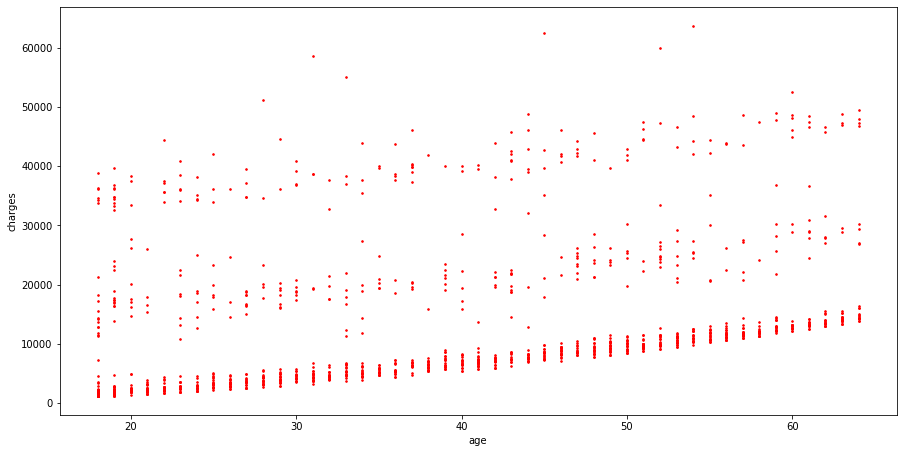

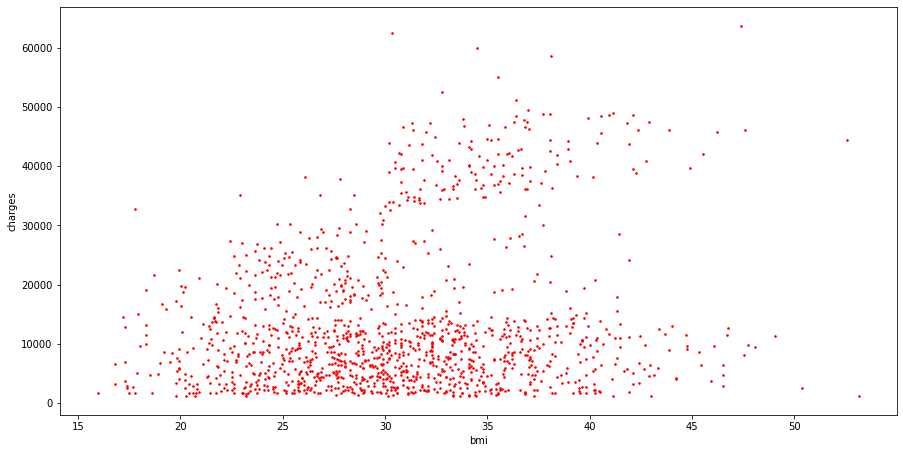

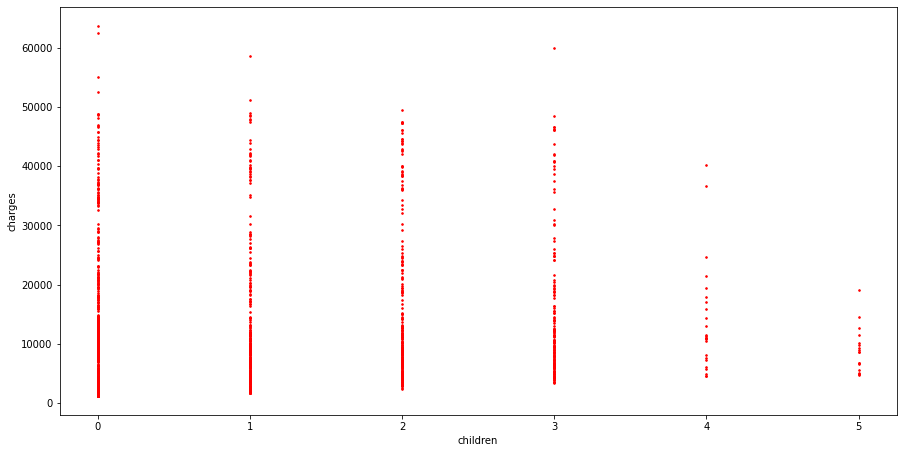

In [3]:
fig = plt.figure(1)
fig.set_size_inches(15, 7.5)
plt.scatter(data2[:, 0], data2[:, 3], marker='.', c='r', s=10)
plt.xlabel('age')
plt.ylabel('charges')

fig = plt.figure(2)
fig.set_size_inches(15, 7.5)
plt.scatter(data2[:, 1], data2[:, 3], marker='.', c='r', s=10)
plt.xlabel('bmi')
plt.ylabel('charges')

fig = plt.figure(3)
fig.set_size_inches(15, 7.5)
plt.scatter(data2[:, 2], data2[:, 3], marker='.', c='r', s=10)
plt.xlabel('children')
plt.ylabel('charges')

plt.show()

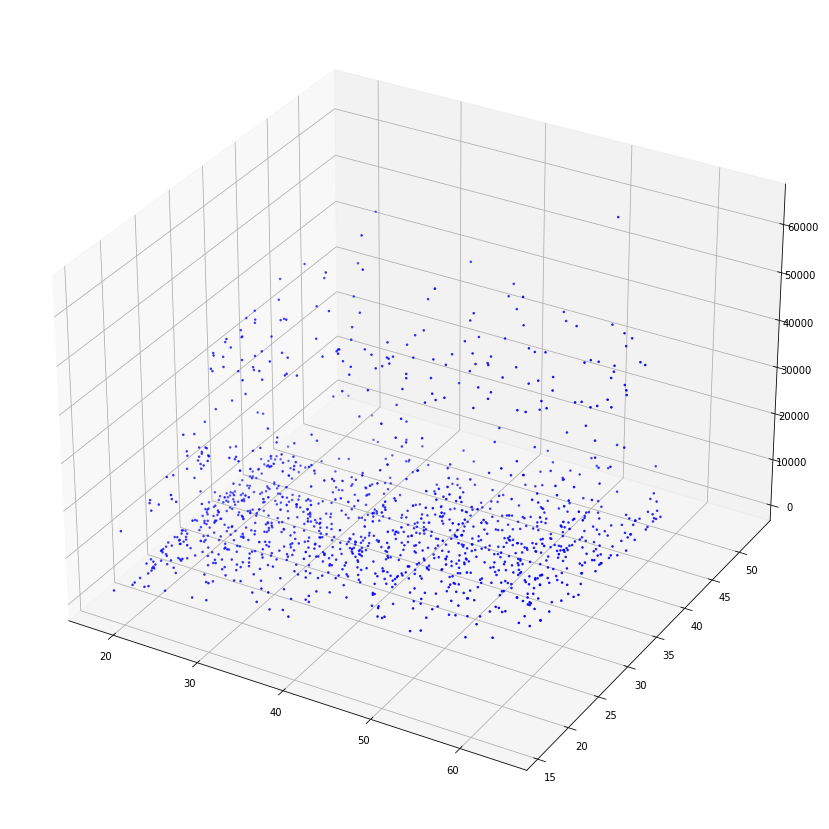

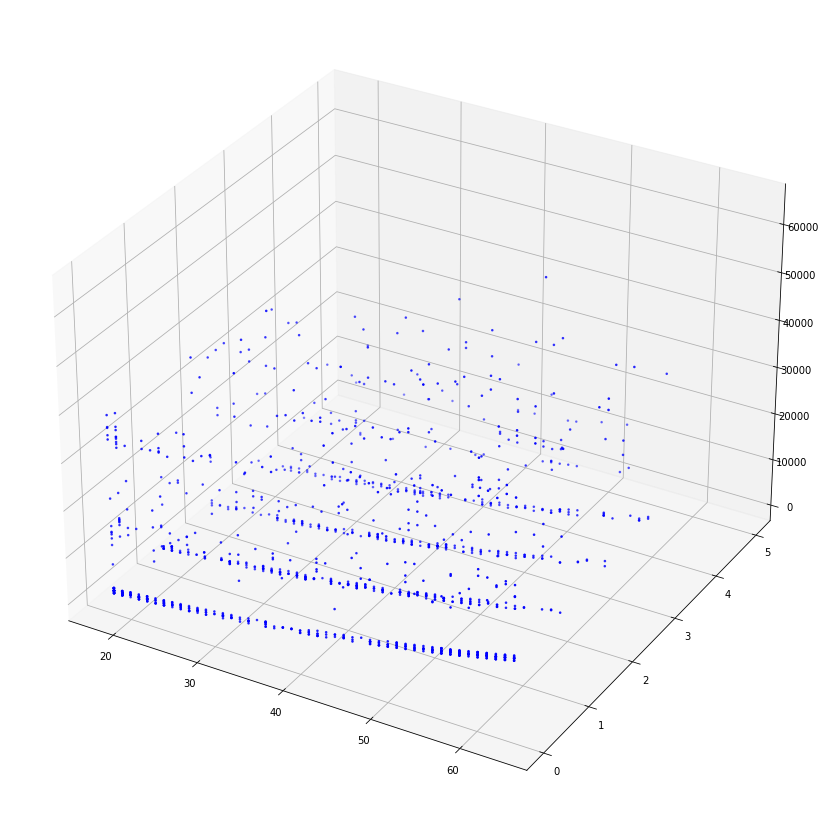

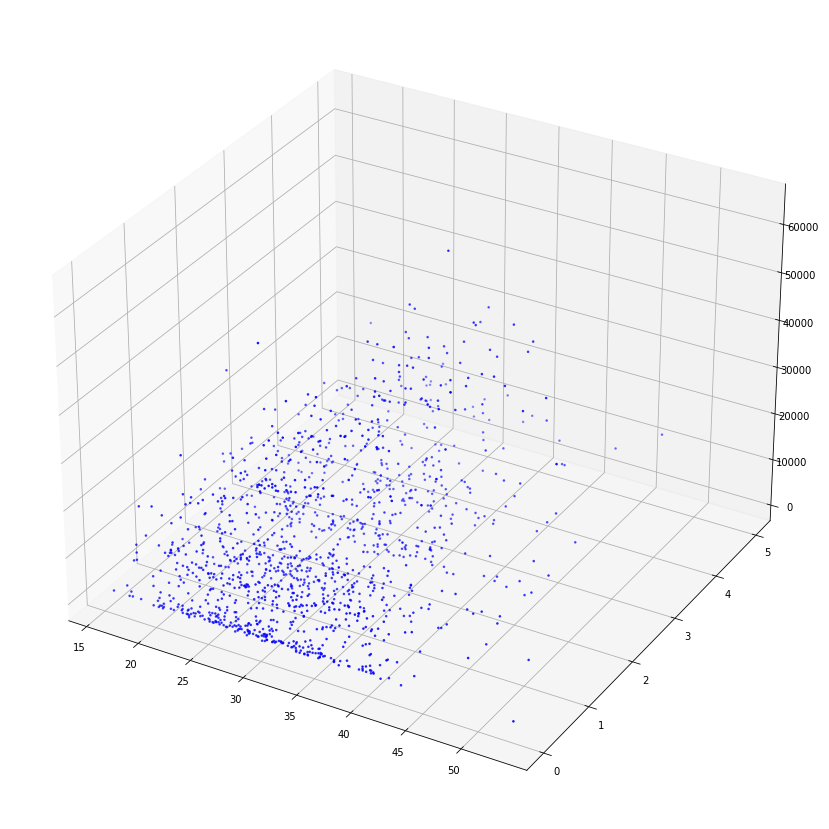

In [4]:
fig = plt.figure(1)
fig.set_size_inches(15, 15)
ax = fig.add_subplot(projection='3d')
ax.scatter(data2[:, 0], data2[:, 1], zs=data2[:, 3], marker='.', c='b', s=10)

fig = plt.figure(2)
fig.set_size_inches(15, 15)
ax = fig.add_subplot(projection='3d')
ax.scatter(data2[:, 0], data2[:, 2], zs=data2[:, 3], marker='.', c='b', s=10)

fig = plt.figure(3)
fig.set_size_inches(15, 15)
ax = fig.add_subplot(projection='3d')
ax.scatter(data2[:, 1], data2[:, 2], zs=data2[:, 3], marker='.', c='b', s=10)

plt.show()

In [5]:
# charge = theta0 * age + theta1 * bmi + theta2 * child + theta3        

def maerror(x, y, theta):
    mse = 0
    p = x @ theta
    mse = np.sum(np.abs(y - p)) / (2 * len(y))
    return mse

def mserror(x, y, theta):
    mse = 0
    p = x @ theta
    mse = np.sum((y - p) ** 2) / (2 * len(y))
    return mse

def linear_regression_GD(x, y, theta=np.array([0, 0, 0, 0]), lRate=0.000001, epochs = 10000):
    m = len(y)
    loss = []
    x = np.append(x, np.ones((m, 1)), axis=1)
    for _ in range(epochs):
        p = x @ theta
        theta = theta - ((lRate / m) * (np.transpose(x) @ (p - y)))
        loss.append(mserror(x, y, theta))
    return theta, loss

def linear_regression_mbGD(x, y, theta=np.array([0, 0, 0, 0]), lRate=0.000001, batch_size=50, epochs=10000):
    m = len(y)
    loss = []
    rng = np.random.default_rng()
    myData = np.append(x, np.transpose(np.array([y])), axis=1)
    x = np.append(x, np.ones((m, 1)), axis=1)
    for _ in range(epochs):
        rng.shuffle(myData)
#        for i in range(0, m, batch_size):
        x_batch = myData[0: batch_size, :3]
        x_batch = np.append(x_batch, np.ones((len(x_batch), 1)), axis=1)
        y_batch = myData[0: batch_size, 3]
        p = x_batch @ theta
        theta = theta - ((lRate / m) * (np.transpose(x_batch) @ (p - y_batch)))
        loss.append(mserror(x, y, theta))
    return theta, loss

def linear_regression_SGD(x, y, theta=np.array([0, 0, 0, 0]), lRate=0.000001, epochs=10000):
    m = len(y)
    loss = []
    rng = np.random.default_rng()
    myData = np.append(x, np.transpose(np.array([y])), axis=1)
    x = np.append(x, np.ones((m, 1)), axis=1)
    for _ in range(epochs):
        rng.shuffle(myData)
        # for i in range(m):
        myX = np.append(myData[i, :3], [1])
        myY = myData[i, 3]
        p = myX @ theta
        theta = theta - ((lRate / m) * (np.transpose(myX) * (p - myY)))
        loss.append(mserror(x, y, theta))
    return theta, loss

## در سه سلول زیر با فراخوانی سه متد فوق عملکرد هر یک نشان داده شده‌است. اعوجاج موجود در این پلات‌ها نشان می‌دهد این متدها در نهایت به نقطه‌ای رسیده‌اند که تابع هزینه تغییر زیادی نمی‌کند و با تغییر نرخ یادگیری این اعوجاج در زمان متفاوتی رخ خواهد داد.
## درنهایت با تعداد تکرار برابر هر سه متد به کمینه خطای برابری دست می‌یابند.
### Learning Rate = نرخ یادگیری

Thetas: [212.46705799 166.98142443  11.6860603    3.21627545] 
MSE: 65338141.2933892


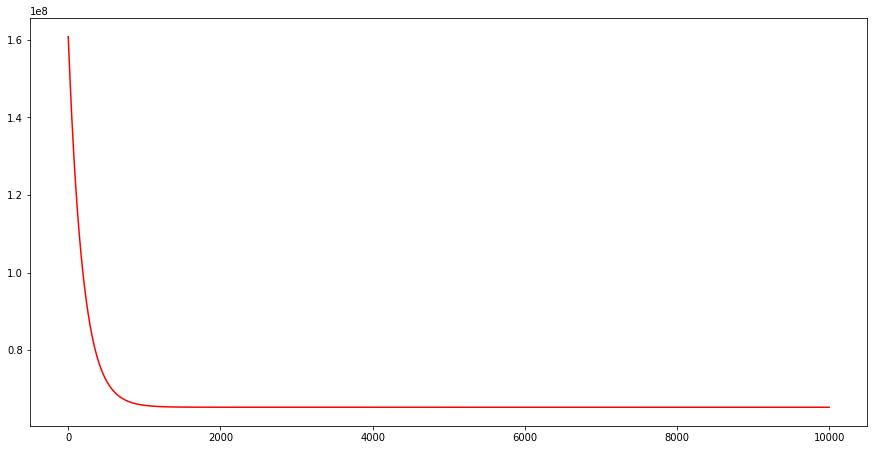

In [6]:
thetaGD, lossGD = linear_regression_GD(data2[:, :3], data2[:, 3])

print("Thetas:", thetaGD, "\nMSE:", lossGD[-1])

fig = plt.figure()
fig.set_size_inches(15, 7.5)
plt.plot(lossGD, 'r')

Thetas: [4.2199901  3.10100615 0.11347641 0.09759342] 
MSE: 157639034.24853307


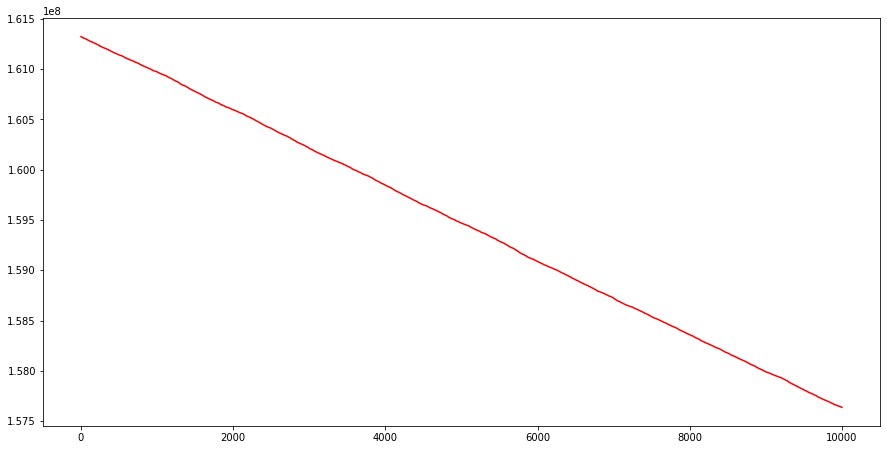

In [7]:
thetaSGD, lossSGD = linear_regression_SGD(data2[:, :3], data2[:, 3])

print("Thetas:", thetaSGD, "\nMSE:", lossSGD[-1])

fig = plt.figure()
fig.set_size_inches(15, 7.5)
plt.plot(lossSGD, 'r')

Thetas: [186.31951073 137.94019469   5.34624458   4.25523798] 
MSE: 67282649.4229287


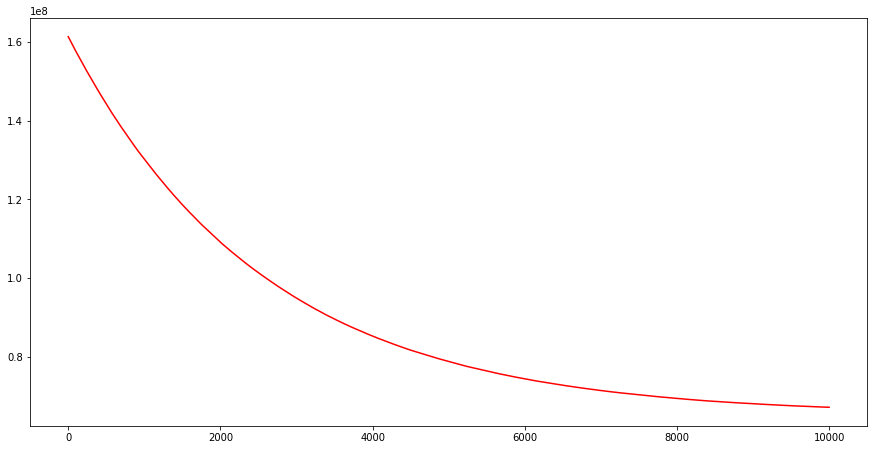

In [8]:
thetaMbGD, lossMbGD = linear_regression_mbGD(data2[:, :3], data2[:, 3], batch_size=100)

print("Thetas:", thetaMbGD, "\nMSE:", lossMbGD[-1])

fig = plt.figure()
fig.set_size_inches(15, 7.5)
plt.plot(lossMbGD, 'r')

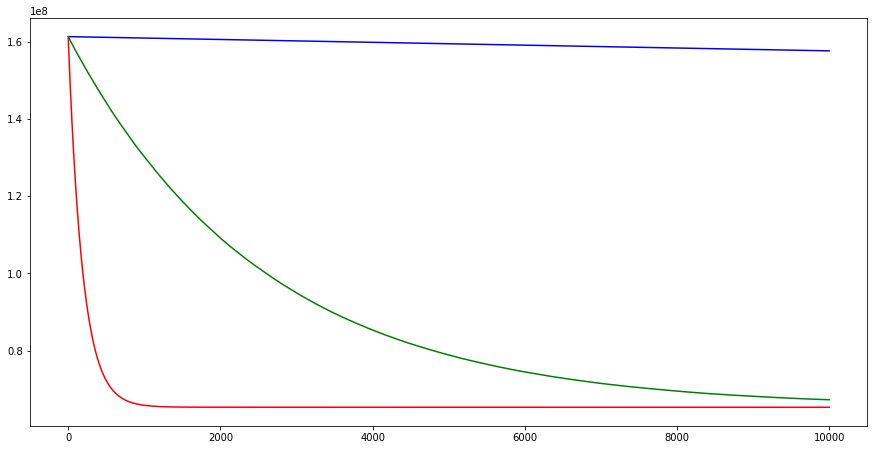

In [9]:
fig = plt.figure()
fig.set_size_inches(15, 7.5)
plt.plot(lossGD, 'r')
plt.plot(lossSGD, 'b')
plt.plot(lossMbGD, 'g')

Thetas: [212.47760632 166.96485318  12.1508711    2.77069186] 
MSE: 65337789.59790031


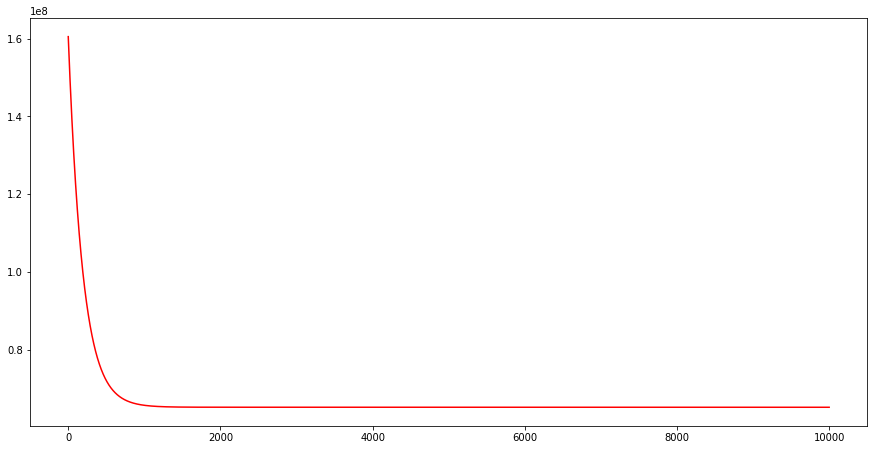

In [10]:
sTheta = np.random.randn(4)
thetaGDRand, lossGDRand = linear_regression_GD(data2[:, :3], data2[:, 3], theta=sTheta)

print("Thetas:", thetaGDRand, "\nMSE:", lossGDRand[-1])

fig = plt.figure()
fig.set_size_inches(15, 7.5)
plt.plot(lossGDRand, 'r')

## سلول زیر نشان می‌دهد مقداردهی تصادفی پارامترهای اولیه تفاوتی در سرعت همگرایی و نتیجه متد نزول گرادیانی ندارد. 

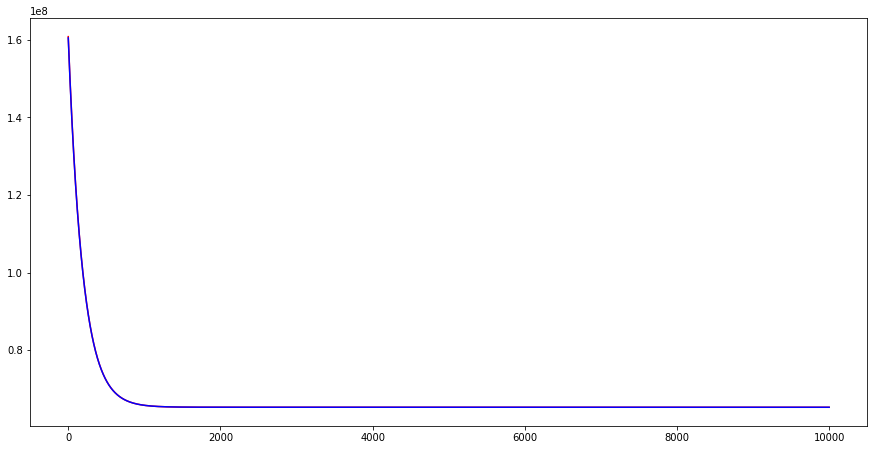

In [11]:
fig = plt.figure()
fig.set_size_inches(15, 7.5)
plt.plot(lossGD, 'r')
plt.plot(lossGDRand, 'b')

## در سلول زیر از کمینه خطای مطلق برای یادگیری مدل استفاده شده است.

Thetas: [4.22143493 3.1100991  0.11519326 0.09807331] 
MAE: 6504.660977608314


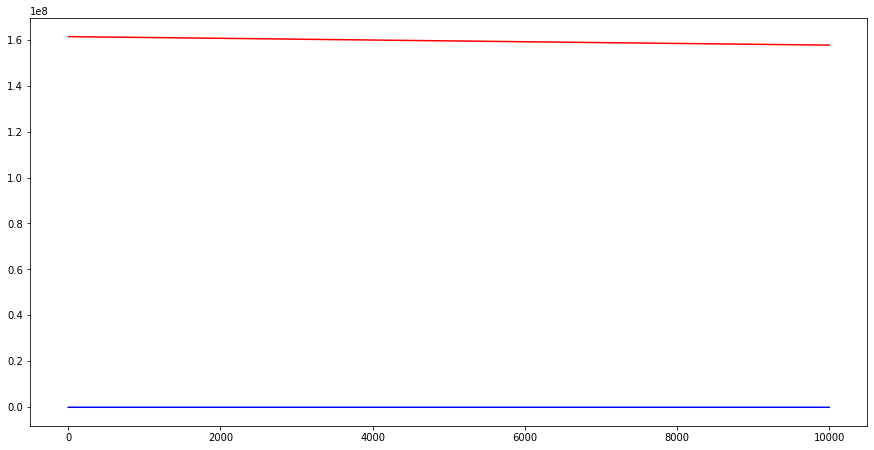

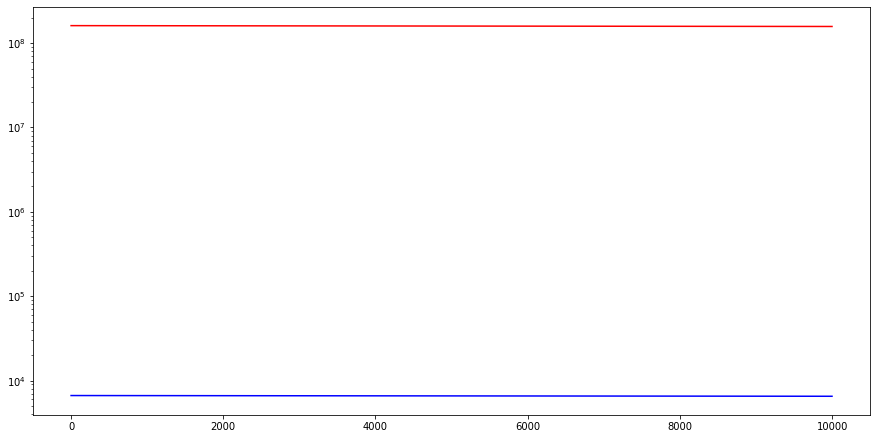

In [16]:
def linear_regression_SGD_MAE(x, y, theta=np.array([0, 0, 0, 0]), lRate=0.000001, epochs=10000):
    m = len(y)
    loss = []
    rng = np.random.default_rng()
    myData = np.append(x, np.transpose(np.array([y])), axis=1)
    x = np.append(x, np.ones((m, 1)), axis=1)
    for _ in range(epochs):
        rng.shuffle(myData)
        # for i in range(m):
        myX = np.append(myData[i, :3], [1])
        myY = myData[i, 3]
        p = myX @ theta
        theta = theta - ((lRate / m) * (np.transpose(myX) * (p - myY)))
        loss.append(maerror(x, y, theta))
    return theta, loss

thetaSGDMAE, lossSGDMAE = linear_regression_SGD_MAE(data2[:, :3], data2[:, 3])

print("Thetas:", thetaSGDMAE, "\nMAE:", lossSGDMAE[-1])

fig = plt.figure(1)
fig.set_size_inches(15, 7.5)
plt.plot(lossSGD, 'r')
plt.plot(lossSGDMAE, 'b')

fig = plt.figure(2)
fig.set_size_inches(15, 7.5)
plt.plot(lossSGD, 'r')
plt.plot(lossSGDMAE, 'b')
plt.yscale('log') 

plt.show()

## در سلول زیر اثر نرخ یادگیری بزرگ بررسی شده‌است که مدل همگرا نمی‌شود.

C:\Users\Mohammad\AppData\Local\Temp/ipykernel_13596/2825632251.py:12: RuntimeWarning: overflow encountered in square
  mse = np.sum((y - p) ** 2) / (2 * len(y))
C:\Users\Mohammad\AppData\Local\Temp/ipykernel_13596/2825632251.py:21: RuntimeWarning: overflow encountered in matmul
  theta = theta - ((lRate / m) * (np.transpose(x) @ (p - y)))
C:\Users\Mohammad\AppData\Local\Temp/ipykernel_13596/2825632251.py:21: RuntimeWarning: invalid value encountered in matmul
  theta = theta - ((lRate / m) * (np.transpose(x) @ (p - y)))
C:\Users\Mohammad\AppData\Local\Temp/ipykernel_13596/2825632251.py:21: RuntimeWarning: invalid value encountered in subtract
  theta = theta - ((lRate / m) * (np.transpose(x) @ (p - y)))


Thetas: [nan nan nan nan] 
MSE: nan


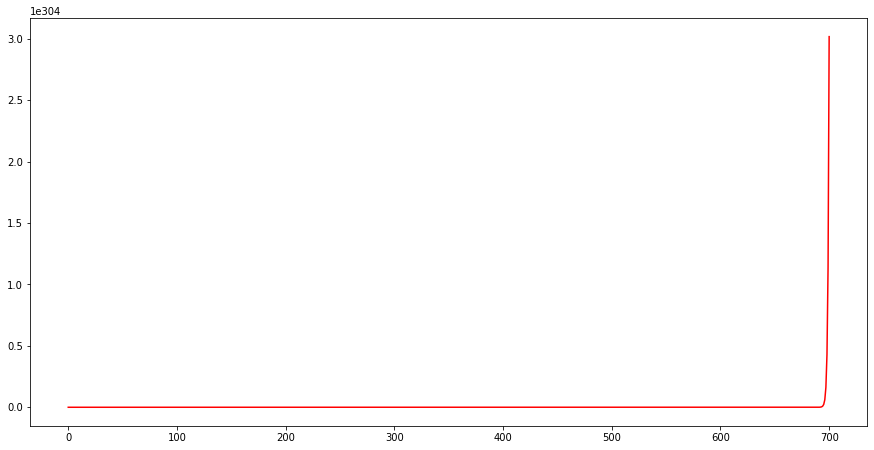

In [17]:
thetaGDBLR, lossGDBLR = linear_regression_GD(data2[:, :3], data2[:, 3], lRate=0.001)

print("Thetas:", thetaGDBLR, "\nMSE:", lossGDBLR[-1])

fig = plt.figure()
fig.set_size_inches(15, 7.5)
plt.plot(lossGDBLR, 'r')

## در سلول زیر اثر نرخ یادگیری کوچک نمایش داده شده‌است که سرعت همگرایی مدل کاهش یافته‌است.

Thetas: [5.63683986 4.1607656  0.15327794 0.13095233] 
MSE: 156410502.98683602


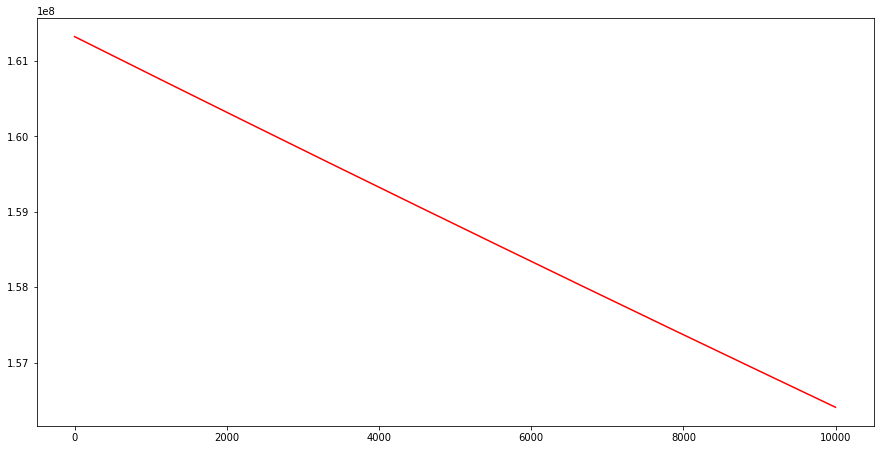

In [18]:
thetaGDSLR, lossGDSLR = linear_regression_GD(data2[:, :3], data2[:, 3], lRate=0.000000001)

print("Thetas:", thetaGDSLR, "\nMSE:", lossGDSLR[-1])

fig = plt.figure()
fig.set_size_inches(15, 7.5)
plt.plot(lossGDSLR, 'r')

## همانطور که در سلول زیر مشاهده می‌شود، نرمال‌سازی سرعت همگرایی را افزایش می‌دهد.

Thetas: [5.1964203  4.06532861 2.31950702 0.09605947] 
MAE: 154674304.80053863


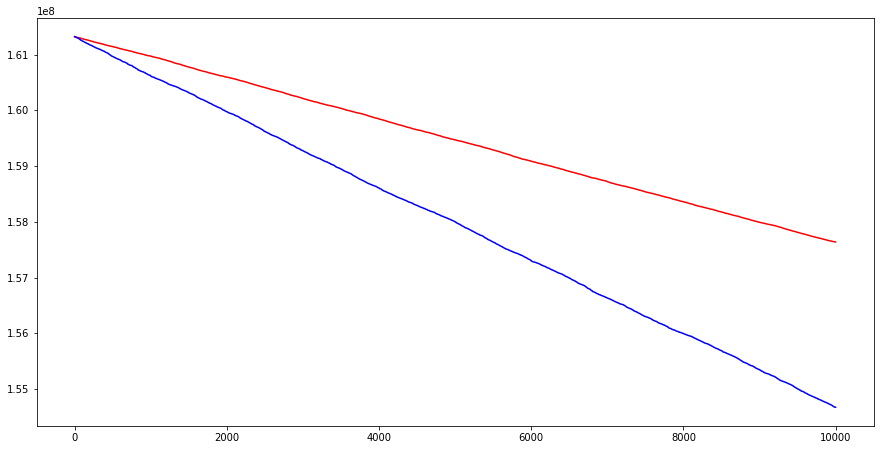

In [19]:
age = data2[:, 0]
bmi = data2[:, 1]
child = data2[:, 2]

age = ((age - age.min()) / (age.max() - age.min())) * 100
bmi = ((bmi - bmi.min()) / (bmi.max() - bmi.min())) * 100
child = ((child - child.min()) / (child.max() - child.min())) * 100

data3 = np.transpose(np.array([age, bmi, child]))

thetaSGDNorm, lossSGDNorm = linear_regression_SGD(data3, data2[:, 3])
print("Thetas:", thetaSGDNorm, "\nMAE:", lossSGDNorm[-1])

fig = plt.figure()
fig.set_size_inches(15, 7.5)
plt.plot(lossSGD, 'r')
plt.plot(lossSGDNorm, 'b')